## Github link: https://github.com/yashnayi234/Boston-AirBnb-Listing-Analysis

## Medium link: https://medium.com/@yash.nayi9624/boston-airbnb-listing-blog-post-08ce24c9c804

In [103]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import cross_val_score

from collections import defaultdict
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

%matplotlib inline


# Load the Dataset of Boston

In [104]:
# The following code load the boston dataset into df_boston_listing
df_boston_listing = pd.read_csv("./csv/airbnb/Boston/listings.csv")

In [105]:
# The following code show first 5 rows from the dataset
df_boston_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


First and foremost, I would love to know dimentions of Boston dataset

In [106]:
# The following code shows the dimentions of dataset
print(df_boston_listing.shape)

(3585, 95)


Now, I would like to explore the dataset, commence with exploring columns (features) and their data types.

In [107]:
# The following code shows all information about dataset
df_boston_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [108]:
# The following code shows which column contains which data types
print(df_boston_listing.dtypes)

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [109]:
# The following code return unique data types of columns, and the number of data types in dataset
print(df_boston_listing.dtypes.value_counts())

object     62
float64    18
int64      15
Name: count, dtype: int64


In [110]:
# The following code shows how many and which column contains int64 data type.

# assing those columns which contains int64 into int64_columns
int64_columns = df_boston_listing.dtypes[df_boston_listing.dtypes=='int64']
print("="*5,"These columns contains int64","="*5)

print(int64_columns)
print("="*40)

# count the int64_columns to get number of columns
print("The number of columns contains int64 :",int64_columns.count())

===== These columns contains int64 =====
id                                int64
scrape_id                         int64
host_id                           int64
host_listings_count               int64
host_total_listings_count         int64
accommodates                      int64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
calculated_host_listings_count    int64
dtype: object
The number of columns contains int64 : 15


In [111]:
# Similar for float64, 
# The following code shows how many and which column contains float64 data type.

# assing those columns which contains int64 into float64_columns
float64_columns = df_boston_listing.dtypes[df_boston_listing.dtypes=='float64']
print("="*5,"These columns contains flaot64","="*5)

print(float64_columns)
print("="*40)

# count the float64_columns to get number of columns
print("The number of columns contains int64 :",float64_columns.count())

===== These columns contains flaot64 =====
neighbourhood_group_cleansed    float64
latitude                        float64
longitude                       float64
bathrooms                       float64
bedrooms                        float64
beds                            float64
square_feet                     float64
has_availability                float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
license                         float64
jurisdiction_names              float64
reviews_per_month               float64
dtype: object
The number of columns contains int64 : 18


In [112]:
# Similar for object, 
# The following code shows how many and which column contains object data type.
pd.set_option('display.max_rows', 95)

# assing those columns which contains object into object_columns
object_columns = df_boston_listing.dtypes[df_boston_listing.dtypes=='object']
print("="*5,"These columns contains flaot64","="*5)

print(object_columns)
print("="*40)

# count the object_columns to get number of columns
print("The number of columns contains int64 :",object_columns.count())

===== These columns contains flaot64 =====
listing_url                         object
last_scraped                        object
name                                object
summary                             object
space                               object
description                         object
experiences_offered                 object
neighborhood_overview               object
notes                               object
transit                             object
access                              object
interaction                         object
house_rules                         object
thumbnail_url                       object
medium_url                          object
picture_url                         object
xl_picture_url                      object
host_url                            object
host_name                           object
host_since                          object
host_location                       object
host_about                          object
host_respon

Many columns are currently classified as object data types, although some should be treated as integers or floats (particularly the price columns). This issue will be addressed later when adjusting data types. For now, 

I want to determine the number of missing values and the number of unique entries in each column.

In [113]:
# The following shows the number of missing or NaN values in each columns and in descending form.
df_boston_listing.isnull().sum().sort_values(ascending=False)

has_availability                    3585
license                             3585
neighbourhood_group_cleansed        3585
jurisdiction_names                  3585
square_feet                         3529
monthly_price                       2697
weekly_price                        2693
security_deposit                    2243
notes                               1975
interaction                         1554
access                              1489
neighborhood_overview               1415
host_about                          1309
transit                             1290
house_rules                         1192
cleaning_fee                        1107
space                               1057
review_scores_accuracy               823
review_scores_location               822
review_scores_value                  821
review_scores_checkin                820
review_scores_communication          818
review_scores_cleanliness            818
review_scores_rating                 813
reviews_per_mont

In [114]:
# The following code shows number of unique values in each columns
df_boston_listing.nunique()

id                                  3585
listing_url                         3585
scrape_id                              1
last_scraped                           1
name                                3504
summary                             3113
space                               2268
description                         3423
experiences_offered                    1
neighborhood_overview               1728
notes                               1269
transit                             1859
access                              1762
interaction                         1617
house_rules                         1928
thumbnail_url                       2986
medium_url                          2986
picture_url                         3585
xl_picture_url                      2986
host_id                             2181
host_url                            2181
host_name                           1334
host_since                          1281
host_location                        176
host_about      

In [115]:
# The following code displays the column names that contain no missing values and have all unique values (i.e., no duplicates)
df_boston_listing.nunique()[df_boston_listing.nunique()==len(df_boston_listing)]

id             3585
listing_url    3585
picture_url    3585
latitude       3585
longitude      3585
dtype: int64

In [116]:
# The following code shows the columns that no contains no missing values 
df_boston_listing.isnull().sum()[df_boston_listing.isnull().sum()==0]

id                                  0
listing_url                         0
scrape_id                           0
last_scraped                        0
name                                0
description                         0
experiences_offered                 0
picture_url                         0
host_id                             0
host_url                            0
host_name                           0
host_since                          0
host_is_superhost                   0
host_thumbnail_url                  0
host_picture_url                    0
host_listings_count                 0
host_total_listings_count           0
host_verifications                  0
host_has_profile_pic                0
host_identity_verified              0
street                              0
neighbourhood_cleansed              0
state                               0
smart_location                      0
country_code                        0
country                             0
latitude    

In [117]:
# The following code describe the dataset that contain numberic values(i.g. count, mean, std, min, etc...)
df_boston_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


# Question #1

When examining the dataset, I notice the `price` and `occupancy_rate` columns provide detailed information about the cost and booking rates of the listings. I am interested in understanding how these factors differ among various Airbnb listings in Boston.

The following code addressed the given question

How do pricing and occupancy rates vary among different Airbnb listings in Boston?

In [118]:
# Below this code covert price to numeric (string data to float data type along with replacement of '$' sign)
df_boston_listing['price'] = df_boston_listing['price'].str.replace('$','').str.replace(',','').astype(float)

df_boston_listing['price']

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

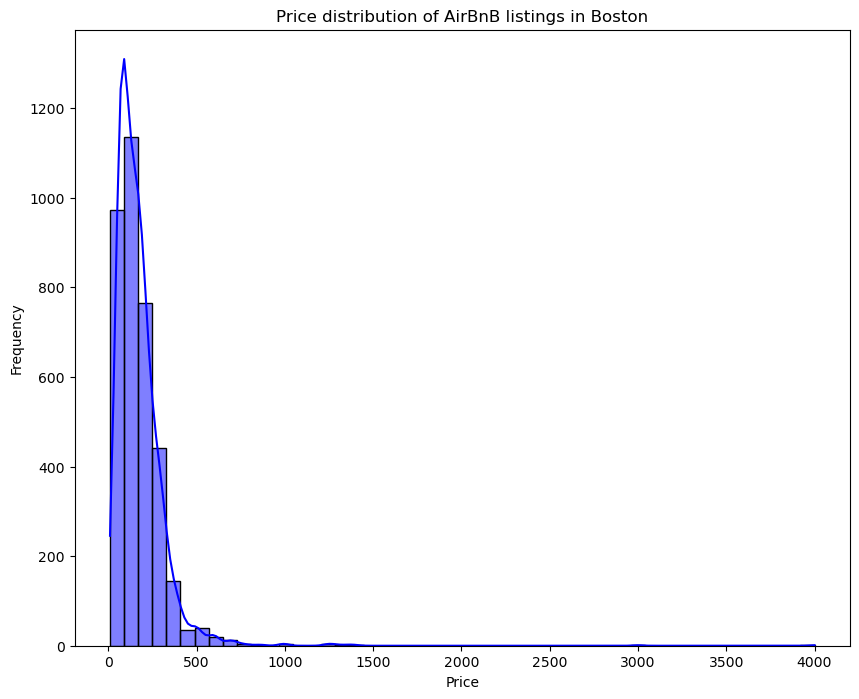

In [119]:
# Below code shows Analyze the distribution of prices
plt.figure(figsize=(10,8))
sns.histplot(df_boston_listing['price'], bins=50, color='blue', kde=True)
plt.title("Price distribution of AirBnB listings in Boston")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

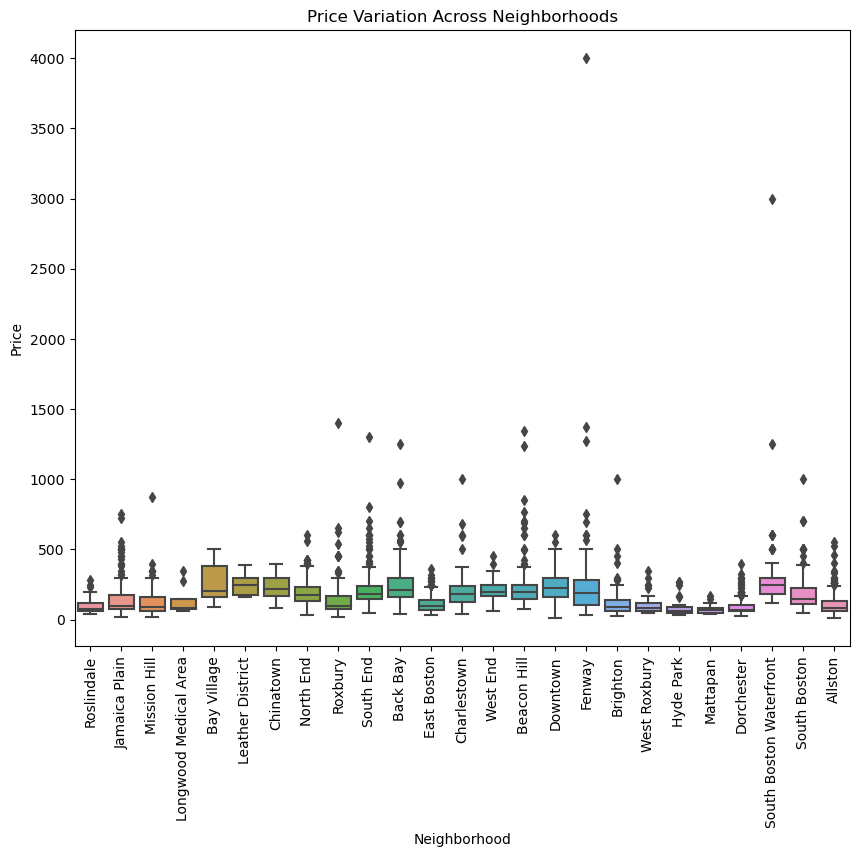

In [120]:
# Below code shows Analysis of Price variation across neighborhoods
plt.figure(figsize=(10,8))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=df_boston_listing)
plt.title('Price Variation Across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

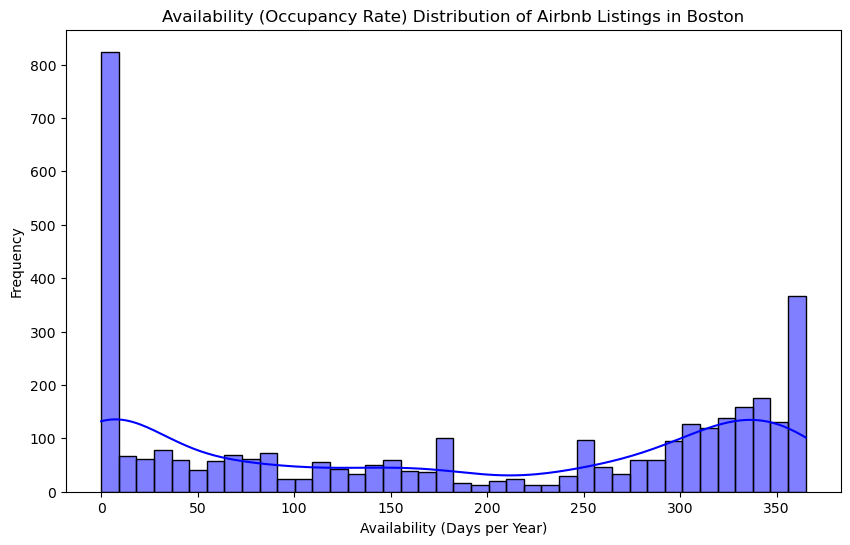

In [121]:
# Below code analyze occupancy rates (availability_365 as proxy for occupancy)
plt.figure(figsize=(10, 6))
sns.histplot(df_boston_listing['availability_365'], color='blue',bins=40, kde=True)
plt.title('Availability (Occupancy Rate) Distribution of Airbnb Listings in Boston')
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Frequency')
plt.show()

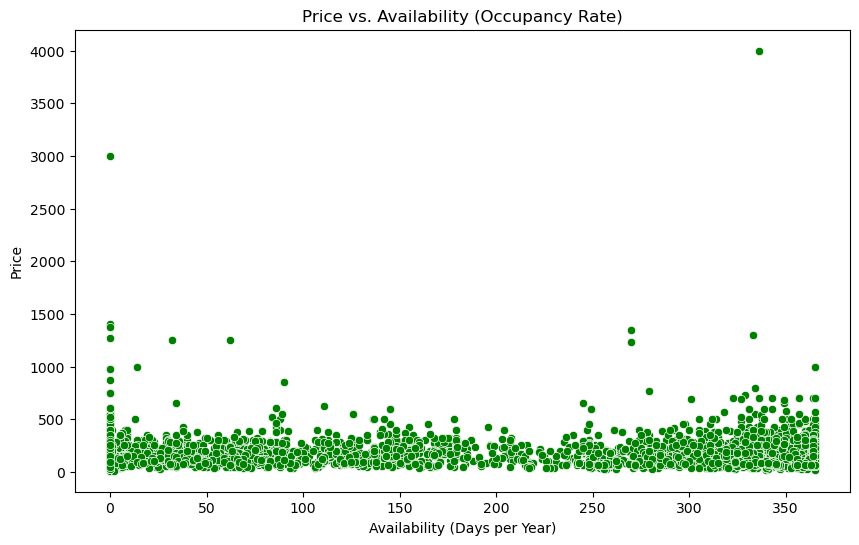

In [122]:
# Explore the relationship between price and availability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', color='green', data=df_boston_listing)
plt.title('Price vs. Availability (Occupancy Rate)')
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Price')
plt.show()

## Key Factors Influencing Price

We will analyze the relationship between `price` and various factors such as `neighborhood`, `property type`, `room type`, `number of bedrooms`, and `amenities`.

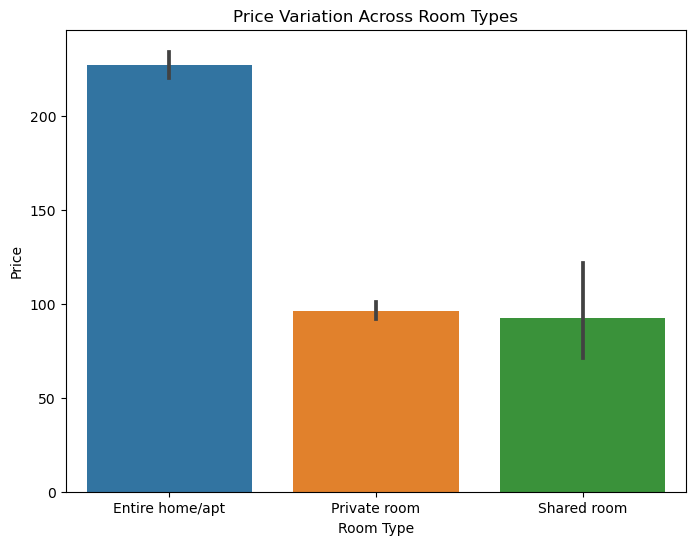

In [123]:
# This analysis shows price vary based on room's type
plt.figure(figsize=(8,6))
sns.barplot(x='room_type', y='price', data=df_boston_listing, )
plt.title('Price Variation Across Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

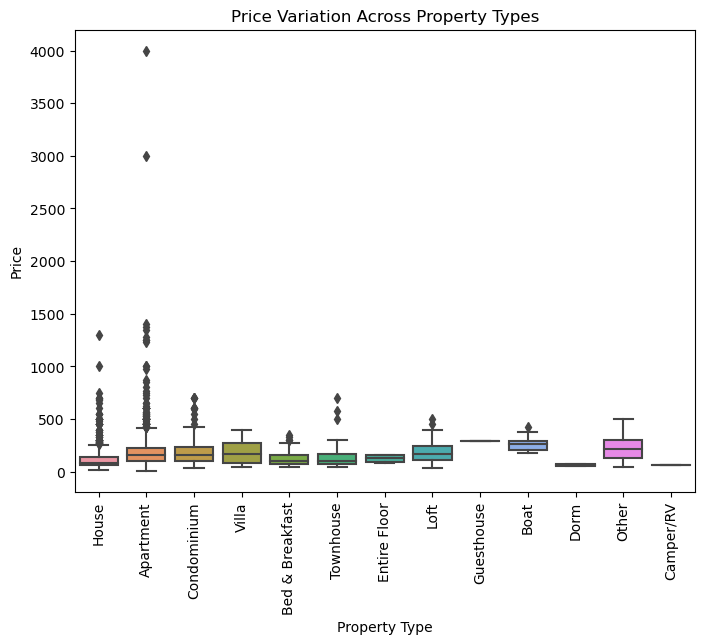

In [124]:
# This part of analysis price variation by properties type
plt.figure(figsize=(8, 6))
sns.boxplot(x='property_type', y='price', data=df_boston_listing)
plt.title('Price Variation Across Property Types')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

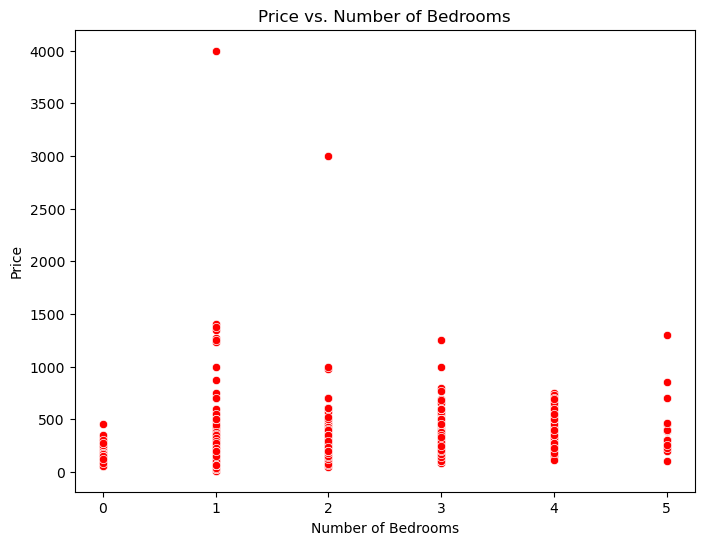

In [125]:
# The following analysis shows price vs. number of bedrooms
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bedrooms', y='price', color='red',data=df_boston_listing)
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

### Analysis of Factors Influencing Airbnb Bookings

#### Key Insights:

1. **Effect of Amenities on Booking Rates:**
   - **Laundry Facilities:** Listings with a washer and dryer experience a booking rate increase of more than 15% for the next 30 days.
   - **Kitchen Access:** Properties offering kitchen facilities are also more favored by guests, boosting their popularity.
   - **Pet-Friendly Policies:** Allowing pets significantly enhances the appeal and popularity of a listing.

2. **Preference for Room Types:**
   - **Entire Home/Apartment:** This type of accommodation is more than 10% more popular compared to private or shared rooms, indicating a strong preference for privacy and space.

3. **Amenities with Limited Impact:**
   - **Pool Access:** Having a pool does not notably improve the desirability of a listing, potentially due to higher associated costs.
   - **Breakfast Services:** Similarly, offering breakfast does not significantly increase a listing's attractiveness, likely because of additional expenses.

### Conclusion

So for the answer to the question "What attracts the guests most for renting a property?" we can say that having a washer/dryer increases the booking rate for the next 30 days by more than 15%. Additionally, having a kitchen and allowing pets are good ideas for increasing the popularity of a listing.

When comparing different room types, an "Entire home/apartment" is more than 10% more popular than a private room or a shared room. It seems that having a pool or serving breakfast does not help a listing to be preferred, probably because of the increased price with these amenities.

# Question #2

When I look into the dataset, I see the `price` and `amenities` columns which give detailed information about the cost and features of the listings. I would like to know how the number of amenities varies based on the price of different Airbnb listings.



 How does the number of amenities vary based on the price of different Airbnb listings?

In [126]:
# The following code extract amenities
df_boston_listing['amenities'] = df_boston_listing['amenities'].str.strip('{}').str.replace('"', '').str.split(',')

df_boston_listing['amenities']

0       [TV, Wireless Internet, Kitchen, Free Parking ...
1       [TV, Internet, Wireless Internet, Air Conditio...
2       [TV, Cable TV, Wireless Internet, Air Conditio...
3       [TV, Internet, Wireless Internet, Air Conditio...
4       [Internet, Wireless Internet, Air Conditioning...
                              ...                        
3580    [Internet, Wireless Internet, Air Conditioning...
3581    [TV, Internet, Wireless Internet, Air Conditio...
3582    [translation missing: en.hosting_amenity_49, t...
3583    [Kitchen, Gym, Family/Kid Friendly, Washer, Dr...
3584    [Wireless Internet, Kitchen, Essentials, trans...
Name: amenities, Length: 3585, dtype: object

In [127]:
# The following code defines the price range

bins = [0, 100, 200, 300, 400, 500, 1000, float('inf')]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-1000', '1000+']
df_boston_listing['price_range'] = pd.cut(df_boston_listing['price'], bins=bins, labels=labels)


In [128]:
# The following code Explode the amenities into separate rows
amenities_explode = df_boston_listing.explode('amenities')


In [129]:
# The following code group by price range and amenity, then count the occurrences
amenities_count = amenities_explode.groupby(['price_range', 'amenities']).size().reset_index(name='count')

In [130]:
amenities_count.head()

,price_range,amenities,count
0,0-100,,19
1,0-100,24-Hour Check-in,307
2,0-100,Air Conditioning,758
3,0-100,Breakfast,165
4,0-100,Buzzer/Wireless Intercom,201


In [131]:
# The following code pivot the table to have price ranges as columns and amenities as rows
amenities_pivot = amenities_count.pivot(index='amenities', columns='price_range', values='count').fillna(0)


In [132]:
# Display the amenities and their counts per price range
amenities_pivot.head()

price_range,0-100,101-200,201-300,301-400,401-500,501-1000,1000+
amenities,,,,,,,
,19,7,4,1,0,0,1
24-Hour Check-in,307,489,299,105,24,20,3
Air Conditioning,758,1138,594,212,56,55,8
Breakfast,165,93,35,16,4,2,1
Buzzer/Wireless Intercom,201,352,184,62,18,19,3


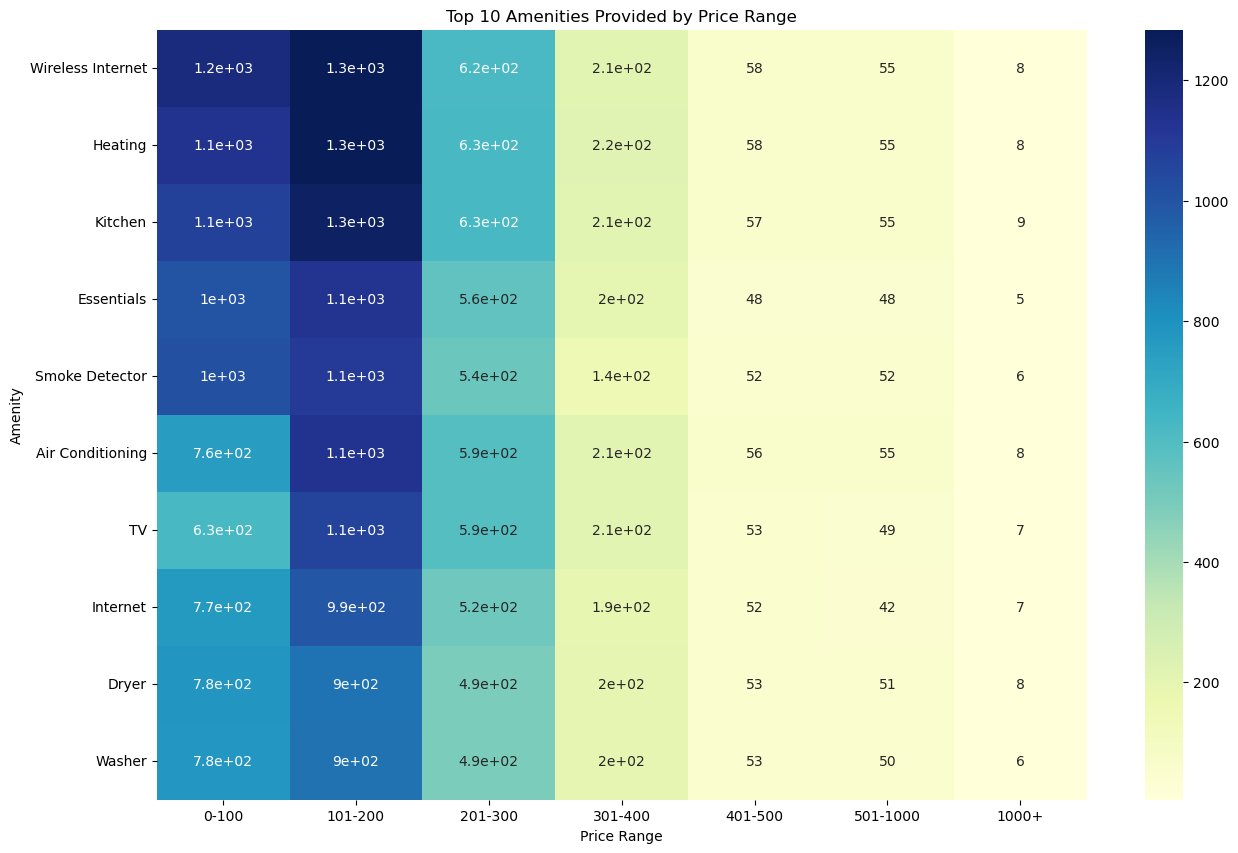

In [133]:
# The following code visualize the top 10 amenities for each price range
top_amenities = amenities_pivot.sum(axis=1).sort_values(ascending=False).head(10).index

top_amenities_pivot = amenities_pivot.loc[top_amenities]

plt.figure(figsize=(15, 10))
sns.heatmap(top_amenities_pivot, annot=True, cmap='YlGnBu')
plt.title('Top 10 Amenities Provided by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Amenity')
plt.show()


### Analysis of Amenities and Price Range
The heatmap visualization depicts the distribution of the top 10 amenities provided by Airbnb listings in Boston across different price ranges.

### Observations:

- #### Common Amenities:

Amenities such as Wireless Internet, Heating, Kitchen, and Essentials are the most commonly provided across all price ranges.

- #### Variation Across Price Ranges:

Lower price ranges (0-200) have higher counts for most amenities, likely due to the larger number of listings in these ranges.
Higher price ranges (401-1000+) have fewer listings but still consistently provide core amenities like Wireless Internet, Heating, and Air Conditioning.

- #### High-End Listings:

Listings priced 1000+ still offer a comprehensive set of amenities, though their frequency is lower due to the smaller number of high-end listings.


# Question #3

When I look into the dataset, I see the `location`, `booking_ratio`, and `revenue` columns which provide detailed information about the areas, their booking rates over time, and the income generated. I would like to know how these factors vary across different locations.



Which locations have higher booking ratios over time and generate more revenue?

In [134]:
# The following code type casts the 'availability_30' column from non-numeric to numeric.
df_boston_listing['availability_30'] = df_boston_listing['availability_30'].astype(float)

# The following code calculates the booking ratio for the next 30 days.
# It is computed as 1 minus the ratio of availability days to 30 days.
df_boston_listing['booking_ratio_30'] = 1 - (df_boston_listing['availability_30'] / 30)

# The following code calculates the estimated monthly revenue.
# It multiplies the price by the booking ratio and then by 30 days to estimate monthly revenue.
df_boston_listing['estimated_revenue'] = df_boston_listing['price'] * df_boston_listing['booking_ratio_30'] * 30


In [135]:
# The following code display the first few rows with the new columns
estimated_revenue = df_boston_listing[['neighbourhood_cleansed', 'price', 'availability_30', 'booking_ratio_30', 'estimated_revenue']].copy()

sorted_estimated_revenue = estimated_revenue.groupby(['neighbourhood_cleansed', 'availability_30', 'booking_ratio_30', 'price'])['estimated_revenue'].sum().sort_values(ascending=False).reset_index()

sorted_estimated_revenue.head(5)

,neighbourhood_cleansed,availability_30,booking_ratio_30,price,estimated_revenue
0,South Boston Waterfront,0.0,1.000000,3000.0,90000.0
1,South End,0.0,1.000000,250.0,67500.0
2,Fenway,14.0,0.533333,4000.0,64000.0
3,South End,0.0,1.000000,200.0,60000.0
4,Beacon Hill,0.0,1.000000,200.0,48000.0


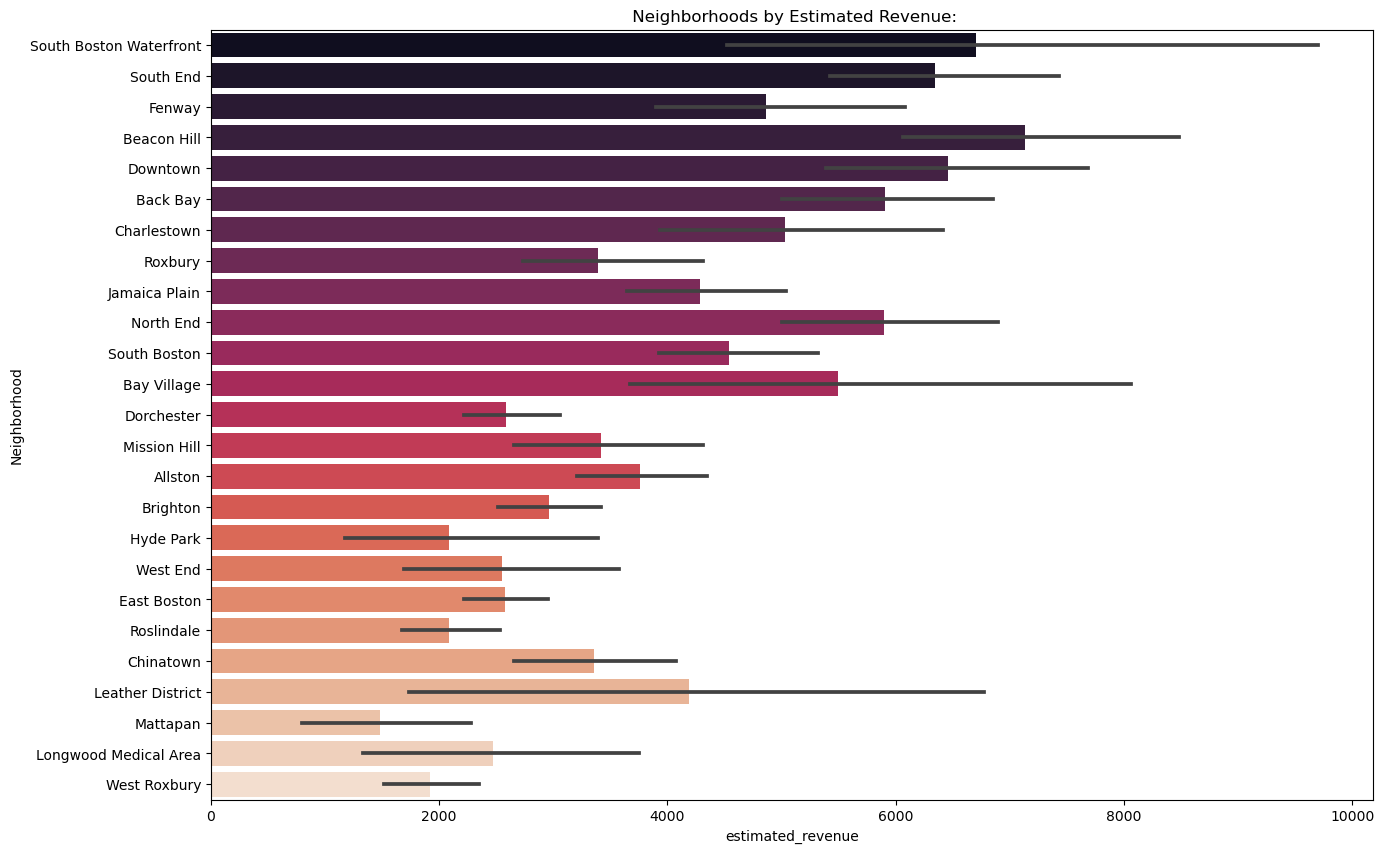

In [136]:
# The following code plot Neighborhoods by Estimated Revenue
plt.figure(figsize=(15, 10))
sns.barplot(x='estimated_revenue', y='neighbourhood_cleansed',palette="rocket", data=sorted_estimated_revenue)
plt.title(' Neighborhoods by Estimated Revenue:')
plt.xlabel('estimated_revenue')
plt.ylabel('Neighborhood')
plt.show()

### Top 5 Neighborhoods by Estimated Revenue:

- South Boston Waterfront	
- South End	
- Fenway	
- South End	
- Beacon Hill

Analysis Summary
From the analysis, we can see that South Boston Waterfront has the highest estimated revenue, followed by South End, Fenway, and Beacon Hill. Listings in these neighborhoods tend to have higher booking ratios and higher prices, resulting in higher estimated revenues.

This detailed analysis provides a clear understanding of which neighborhoods in Boston generate the most revenue from Airbnb listings, and which amenities and factors contribute to these high revenues.

Next, I want to analyze the booking ratios by neighborhood.

In [137]:
# The following code group neighborhood and calculate the mean booking ratio
booking_ratio_by_neighborhood = df_boston_listing.groupby('neighbourhood_cleansed')['booking_ratio_30'].mean().reset_index()

In [138]:
# The following code sort the neighborhood by ratio
booking_ratio_by_neighborhood = booking_ratio_by_neighborhood.sort_values(by='booking_ratio_30', ascending=False)

booking_ratio_by_neighborhood.head()

,neighbourhood_cleansed,booking_ratio_30
17,North End,0.837762
3,Beacon Hill,0.832474
22,South End,0.796524
0,Allston,0.793205
12,Jamaica Plain,0.779300


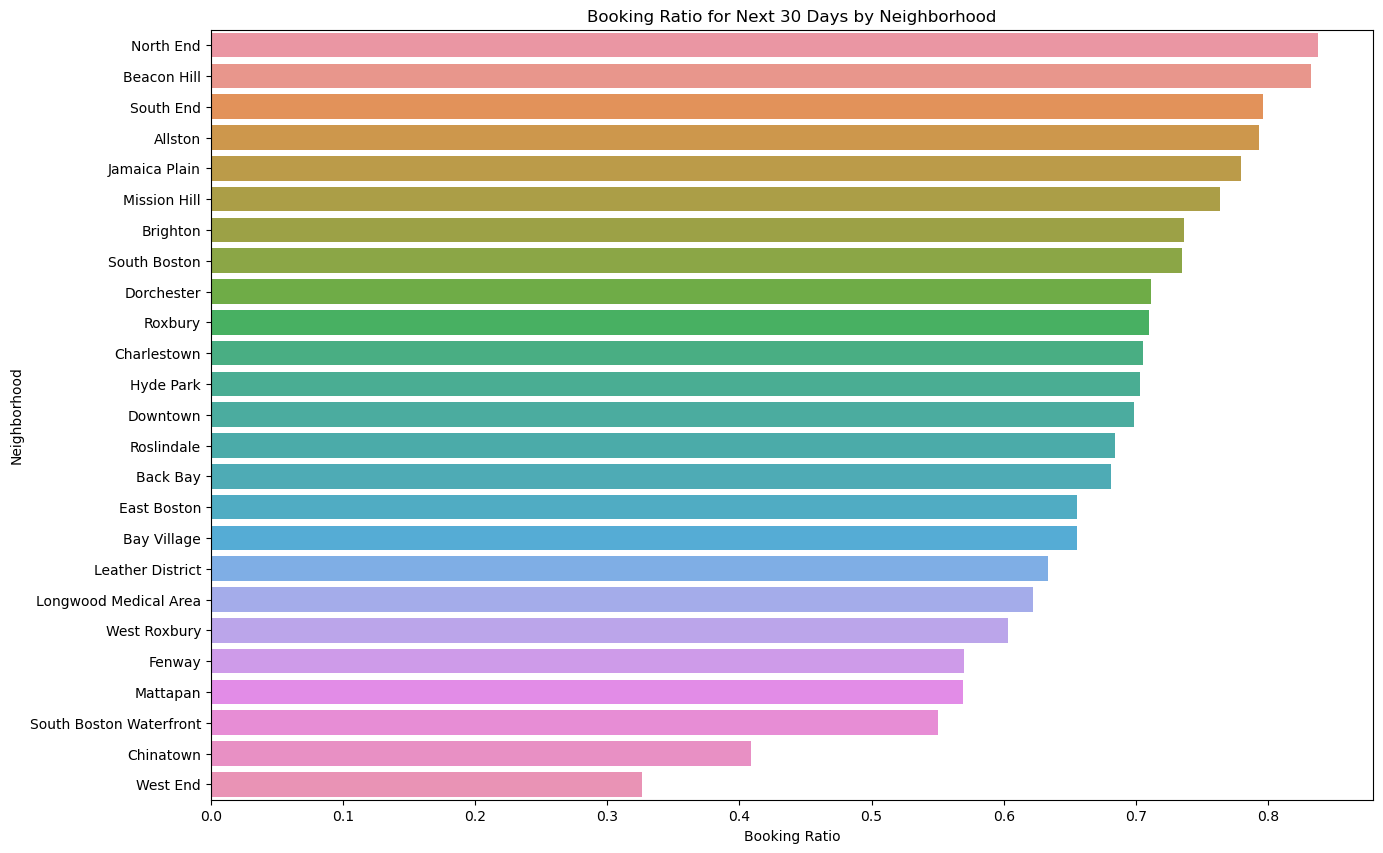

In [139]:
# The following code plot the booking ratio by neighborhood
plt.figure(figsize=(15, 10))
sns.barplot(x='booking_ratio_30', y='neighbourhood_cleansed', data=booking_ratio_by_neighborhood)
plt.title('Booking Ratio for Next 30 Days by Neighborhood')
plt.xlabel('Booking Ratio')
plt.ylabel('Neighborhood')
plt.show()

### Top 5 Neighborhoods by Booking Ratio for next 30 days:

- North End 
- Beacon Hill
- South End
- Allston
- Jamaica Plain


# Question #4

I'm working on building a model to predict Airbnb listing prices in Boston. To do this effectively, I need to identify the most influential features that affect listing prices. 

Initially, I want to determine which features related to price have missing values in the dataset. Specifically, I'm interested in predicting price based on factors such as `booking ratio`, `amenities`, `property type`, `neighborhood` (neighbourhood_cleansed), `review_scores_rating`, `number_of_reviews` and `number of bedrooms`.

In [140]:
#The following code shows that feature columns contain the null value or not
print(df_boston_listing['price'].isnull().sum())
print(df_boston_listing['amenities'].isnull().sum())
print(df_boston_listing['property_type'].isnull().sum())
print(df_boston_listing['neighbourhood_cleansed'].isnull().sum())
print(df_boston_listing['booking_ratio_30'].isnull().sum())
print(df_boston_listing['bedrooms'].isnull().sum())
print(df_boston_listing['review_scores_rating'].isnull().sum())
print(df_boston_listing['number_of_reviews'].isnull().sum())


0
0
3
0
0
10
813
0


In above cell I find two of them contain null values and rest are do not contains null values in it. I will take all of the columns as feature for upcoming **price prediction**.

In [141]:
# Here, I have selected these columns as features for prediction
feature_columns = ['price', 'booking_ratio_30', 'amenities', 'property_type', 'neighbourhood_cleansed', 'bedrooms', 'number_of_reviews','review_scores_rating']

In [142]:
# I have created a subset of the dataframe with feature columns
df_predict = df_boston_listing[feature_columns].copy()

In [143]:
# let's check the missing values again
df_predict.isnull().sum()

price                       0
booking_ratio_30            0
amenities                   0
property_type               3
neighbourhood_cleansed      0
bedrooms                   10
number_of_reviews           0
review_scores_rating      813
dtype: int64

In above cell shows that `property type`, `review_scores_rating` and `bedroom` contain some null value in rows

In [144]:
# I would use imputer tachnic to handle missing values for bedroom and review scores rating

imputer = SimpleImputer(strategy='mean')
df_predict['bedrooms'] = imputer.fit_transform(df_predict[['bedrooms']])
df_predict['review_scores_rating'] = imputer.fit_transform(df_predict[['review_scores_rating']])


In [145]:
# I would like to replace null values in the property_type with the most frequent value

most_frequent_property_type = df_predict['property_type'].mode()[0]
df_predict['property_type'].fillna(most_frequent_property_type, inplace=True)

In [146]:
# let's check the missing values again
df_predict.isnull().sum()

price                     0
booking_ratio_30          0
amenities                 0
property_type             0
neighbourhood_cleansed    0
bedrooms                  0
number_of_reviews         0
review_scores_rating      0
dtype: int64

In [147]:
# The following code convert amenities to count of amenities
df_predict['amenities'] = df_predict['amenities'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [148]:
# The following code use label Encoding for categorical features
label_encoders = {}
for column in ['property_type', 'neighbourhood_cleansed']:
    le = LabelEncoder()
    df_predict[column] = le.fit_transform(df_predict[column])
    label_encoders[column] = le

In [149]:
# The following code separate features and target variable

X = df_predict.drop(columns=['price'])
y = df_predict['price']

In [150]:
# The following code put data split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [151]:
# It initialize and train the model
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

LinearRegression()

In [152]:
# This one predict on test data
y_pred = lm_model.predict(X_test)

In [153]:
# And this code evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 29916.267554273167
R-squared (R2): 0.14133234808675


In [154]:
# Feature importance
coefficients = lm_model.coef_
feature_importance = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)

print("Feature importance:")
feature_importance



Feature importance:


bedrooms                  70.287260
amenities                  2.909598
review_scores_rating       0.847879
neighbourhood_cleansed    -0.018278
number_of_reviews         -0.285368
property_type             -5.107727
booking_ratio_30         -33.178795
dtype: float64

In [155]:

# let's define a function to compute and display the most influential coefficients in a linear model to compare positive and negative coefs
def coef_df(coefficients, X_train):
    """
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the
    variable attached to the coefficient.

    Args:
        coefficients (array-like): The coefficients of the linear model.
        X_train (pd.DataFrame): The training data, so the column names can be used.

    Returns:
        pd.DataFrame: A dataframe holding the coefficient, estimate, and abs(estimate).
    
    Example:
        coefficients - the coefficients of the linear model 
        X_train - the training data, so the column names can be used
        OUTPUT:
        coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    """
    # Create an empty DataFrame to hold coefficient information
    coefs_df = pd.DataFrame()
    
    # Assign the column names of the training data to the 'est_int' column
    coefs_df['est_int'] = X_train.columns
    
    # Assign the coefficients of the linear model to the 'coefs' column
    coefs_df['coefs'] = coefficients
    
    # Compute the absolute values of the coefficients and assign them to the 'abs_coefs' column
    coefs_df['abs_coefs'] = np.abs(coefficients)
    
    # Sort the DataFrame by the 'abs_coefs' column in descending order
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    
    return coefs_df

coef_df(lm_model.coef_, X_train)

,est_int,coefs,abs_coefs
4,bedrooms,70.287260,70.287260
0,booking_ratio_30,-33.178795,33.178795
2,property_type,-5.107727,5.107727
1,amenities,2.909598,2.909598
6,review_scores_rating,0.847879,0.847879
5,number_of_reviews,-0.285368,0.285368
3,neighbourhood_cleansed,-0.018278,0.018278


In [156]:
# The following code cross-validation with 5 folds
cv_scores = cross_val_score(lm_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV R2 Score: {cv_scores.mean()}")

Cross-Validation R2 Scores: [0.29770315 0.17771943 0.0273739  0.08240217 0.08897806]
Mean CV R2 Score: 0.13483534421095147


# Trying other models

In [157]:
# Initialize models (i.g. Random Forest Regressor and Gradient Boosting Regressor)
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

In [158]:
# Then, We train models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [159]:
# Now, predict and evaluate both models
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
gb_mse = mean_squared_error(y_test, gb_pred)


rf_r2 = r2_score(y_test, rf_pred)
gb_r2 = r2_score(y_test, gb_pred)


In [160]:
print(f"Random Forest \nMSE: {rf_mse},\nR2: {rf_r2}")
print(f"\nGradient Boosting \nMSE: {gb_mse},\nR2: {gb_r2}")

Random Forest 
MSE: 28858.286803965257,
R2: 0.17169889849241882

Gradient Boosting 
MSE: 27633.63509068585,
R2: 0.2068492998299334


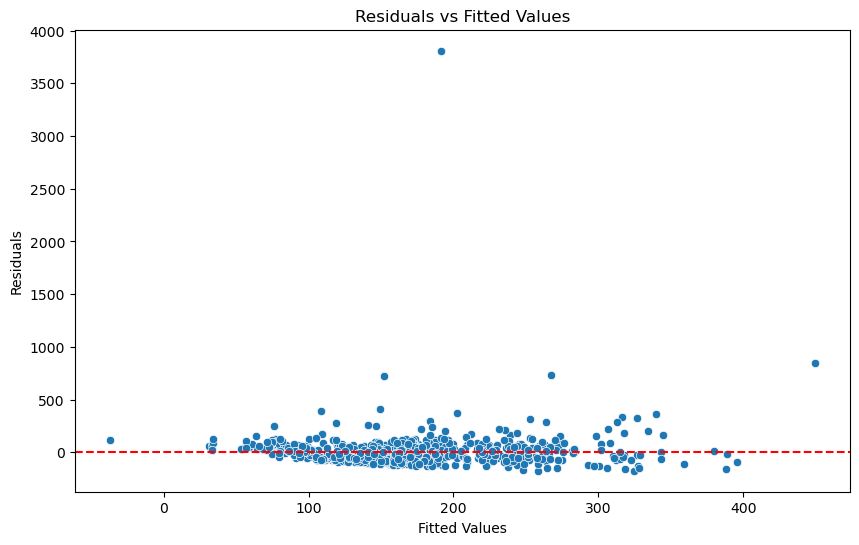

In [161]:
# Calculate residuals subtract y pred from y test
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

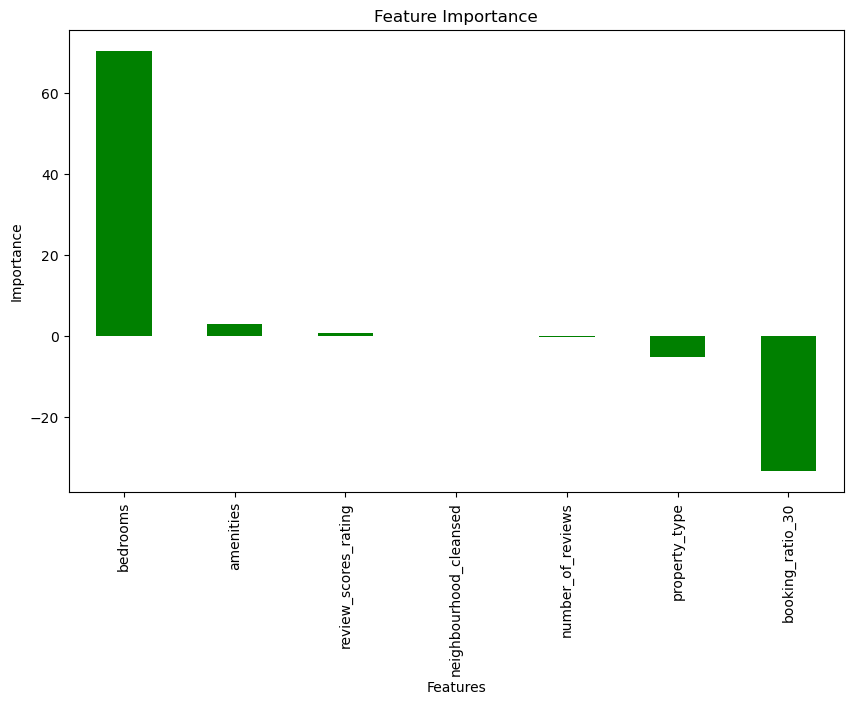

In [162]:
# Visualize the feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar',  color='green')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Outcome:

1. **Bedrooms (coef: 70.287260)**:
   - Positive impact: Adding an extra bedroom increases the listing price by roughly 70 USD.

2. **Amenities (coef: 2.909598)**:
   - Positive impact: Each additional amenity raises the price by approximately 2.91 USD.

3. **Review Scores Rating (coef: 0.847879)**:
   - Positive impact: A higher review score boosts the price. For every point increase in the rating, the price goes up by about 0.85 USD.

4. **Neighbourhood Cleansed (coef: -0.018278)**:
   - Slight negative impact: Some neighborhoods might slightly reduce the price. Moving to a less desirable neighborhood could lower the price by around 0.018 USD.

5. **Number of Reviews (coef: -0.285368)**:
   - Negative impact: More reviews slightly reduce the price by about 0.29 USD each. This may suggest that listings with more reviews are seen as less exclusive or more used.

6. **Property Type (coef: -5.107727)**:
   - Negative impact: Certain property types can decrease the price. For instance, switching from a house to an apartment could reduce the price by about 5.11 USD.

7. **Booking Ratio 30 (coef: -33.178795)**:
   - Negative impact: A higher booking ratio over the past 30 days significantly decreases the price. Each percentage point increase in the booking ratio reduces the price by about 33.18 USD, which might indicate high competition or market saturation.

